## SMS SPAM Filtering : Machine Learning using Scikit-Learn

### AIM: Our objective of this project is to analyze the best Prediction Algorithm for filtering out the SMS. This prediction will help us to classify the best model to predict the SMS as HAM or SPAM

### Questions:

1. Analyzing confusion matrix to identify the False negative and False positive ratio among different models?

2. To compare the loss ratio in predicting the SMS among the three models?

3. To compare the best goodness of the Fit between all models?

4. To suggest over all better performance models?

### Introduction

The growth of mobile phone users has lead to a dramatic increasing of SMS spam messages. In practice, fighting mobile
phone spam is difficult by several factors, including the lower rate of SMS that has allowed many users and service
providers to ignore the issue, and the limited availability of mobile phone spam-filtering software. On the other hand,in academic settings, a major handicap is the scarcity of public SMS spam datasets, that are sorely needed for validation and comparison of different classifiers. Moreover,as SMS messages are fairly short, content-based spam filters may have their performance degraded.

Main problem with SMS spam is that it is not only annoying, but it can also be expensive since some people pay to receive text messages.Mobile Spam varies from region to region: less than 1 % in North America while around 30% in Asia. Moreover, there is a limited availability of mobile phone spam-filtering software. Other concern is that important legitimate messages as of emergency nature could be blocked.

In this project, we compare the performance achieved by several established machine learning methods.

#### Data Collection and Methodologies

We have collected our first data from the Grumbletext Web site. A collection of 425 SMS spam messages was manually extracted,the identification of the text of spam messages in the claims is a very hard and timeconsuming
task, and it involved carefully scanning hundreds of web pages but that was in sufficient for the model building and prediction. 

So we searched for some other legitimate data source and found one public data source - http://
www.dt.fee.unicamp.br/~tiago/smsspamcollection. This  collection is composed by 4,827 legitimate messages
and 747 mobile spam messages, a total of 5,574 short messages. To the best of our knowledge, it is the largest available SMS spam corpus that currently exists.

Hams   4,827  86.60%
Spams   747   13.40
Total  5,574  100.00

### STEPS:

### 1. Obtaining and checking the data

Below we are loading our Dataset.

In [86]:
import pandas as pd
path = '/Users/Akshay/Data/DS/Project/smsspamcollection/data.csv'
data = pd.read_csv(path)

Analyzing the features and Information relevant to the project.

In [87]:
data.shape

(10000, 10)

In [88]:
data.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


Since we require the text and class level to build the model and analyze the SMS, so we have sufficient information in the data file. We are considering only two parameters above to build the model which are stars and text.

### 2. Tidying the data:

We are taking out the best and worst sms text messages based on the class levels. The ham messages are classified  as best with star level 5 and  spam messages are classifies as worst with start level 1.

We require only these two major factors for the machine learning prediction and both the factors are cleaned already,so we are not much tidying the data further for other atrributes.

In [89]:
data_ham_spam = data[(data.stars==5) | (data.stars==1)]

We are building our predictors and response variables on based on the classified data for the model.

In [90]:
X =data_ham_spam.text
y =data_ham_spam.stars

### 3. Building the test and training data-set.

We are using the cross validation technique to create the train and test data. We are using the random state as 1 because we dont want to randomize our data-set each time for each model.
Randomizing our data-set for each model makes our evaluation susceptible and prone to untruthful prediction.

In [91]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

We are classifying our data-set into training and test data-set. We will be building the model on 70% train and 30% test data.

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064,)
(1022,)
(3064,)
(1022,)


Vectorizing the text to convert it from a collection of text documents to a matrix of token counts. We are only two using two token here as said earlier.

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

We are now fitting and transforming our vectorized training and test dataset to build the model.

In [94]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 16825)

In [95]:
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(1022, 16825)

### 4. Analysis and Visualization

Building the Linear SVC model on the training dataset.

In [96]:
from sklearn import svm
from sklearn.svm import LinearSVC
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train_dtm, y_train) 
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Predicting the data from test data by the model.

In [97]:
y_pred_class = lin_clf.predict(X_test_dtm)

####  We will start now analyzing the various models based on various performance metrics and visualising them simataneously

### Model 1 : Linear Model Performance Analysis and Visualization

Accuracy Score - the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [98]:
from sklearn import metrics
acc1=metrics.accuracy_score(y_test, y_pred_class)
acc1

0.9227005870841487

Classification Report - Summary of the Precision, Recall, f1score and support.

In [99]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_class, target_names=target_names))
classreport=classification_report(y_test, y_pred_class, target_names=target_names)

             precision    recall  f1-score   support

    class 0       0.77      0.80      0.79       184
    class 1       0.96      0.95      0.95       838

avg / total       0.92      0.92      0.92      1022



Visualization of the classification report through the heat map.

In [100]:
import matplotlib.pyplot as plt
import numpy as np
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        # print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score','support'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[0.0, 0.77, 0.8, 0.79]
[1.0, 0.96, 0.95, 0.95]


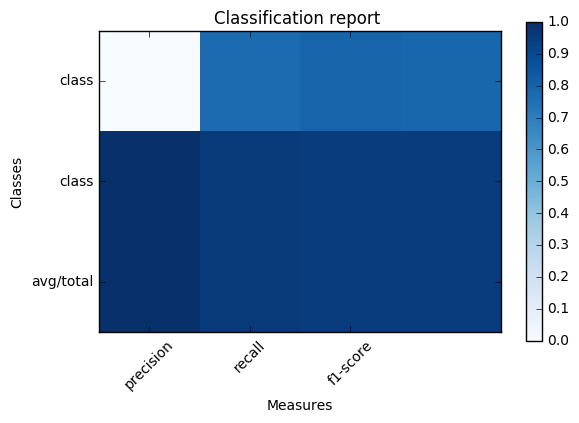

In [101]:
def main():
    plot_classification_report(classreport,with_avg_total=True)
    plt.show()
    plt.savefig('Linear_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()

Hamming Loss - The Hamming loss is the fraction of labels that are incorrectly predicted.

In [102]:
from sklearn.metrics import hamming_loss
hl1=hamming_loss(y_test, y_pred_class)
hl1

0.077299412915851268

Jaccard Similarity Score - defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

In [103]:
import numpy as np   
from sklearn.metrics import jaccard_similarity_score
js1=jaccard_similarity_score(y_test, y_pred_class, normalize=False)
js1

943

F1 score - It be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 at various levels. 

The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 


In [104]:
from sklearn.metrics import f1_score
f1_m=f1_score(y_test, y_pred_class, average='macro') 
f1_m

0.87099980027960844

In [105]:
from sklearn.metrics import f1_score
f1_mi=f1_score(y_test, y_pred_class, average='micro') 
f1_mi

0.9227005870841487

In [106]:
from sklearn.metrics import f1_score
f1_w=f1_score(y_test, y_pred_class, average='weighted') 
f1_w

0.92325994644679454

In [107]:
from sklearn.metrics import f1_score
f1_n=f1_score(y_test, y_pred_class, average=None) 
f1_n

array([ 0.79,  0.95])

Precision Score - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. We have calculated the precison score at various levels.

The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 



In [108]:
from sklearn.metrics import precision_score
pr1_m=precision_score(y_test, y_pred_class, average='macro')
pr1_m

0.86577390515432739

In [109]:
from sklearn.metrics import precision_score
pr1_mi=precision_score(y_test, y_pred_class, average='micro')
pr1_mi

0.9227005870841487

In [110]:
from sklearn.metrics import precision_score
pr1_w=precision_score(y_test, y_pred_class, average='weighted')
pr1_w

0.92394585825136366

In [111]:
from sklearn.metrics import precision_score
pr1_n=precision_score(y_test, y_pred_class, average=None)
pr1_n

array([ 0.77,  0.96])

Recall Score - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. We have calculated the Recall score at various levels.

The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 



In [112]:
from sklearn.metrics import recall_score
rc1_m=recall_score(y_test, y_pred_class, average='macro')
rc1_m

0.87651758846113936

In [113]:
from sklearn.metrics import recall_score
rc1_mi=recall_score(y_test, y_pred_class, average='micro')
rc1_mi

0.9227005870841487

In [114]:
from sklearn.metrics import recall_score
rc1_w=recall_score(y_test, y_pred_class, average='weighted')
rc1_w

0.9227005870841487

In [115]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_class, average=None)

array([ 0.8 ,  0.95])

Confusion Matrix - a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j. Our confusion matrix summarizes the correct number of false positives and false negatives. We have labeled class0 as Predicated False and Class1 as Predicted True.

In [116]:
classes =[]
classes.append('class0')
classes.append('class1')
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[148  36]
 [ 43 795]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.05  0.95]]


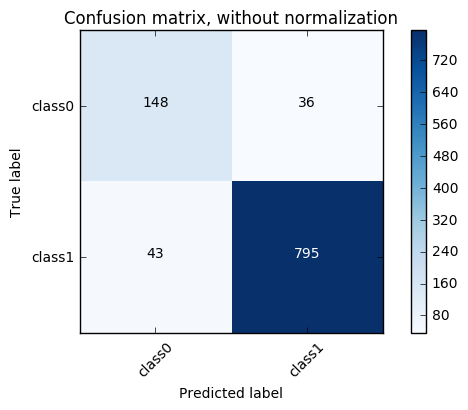

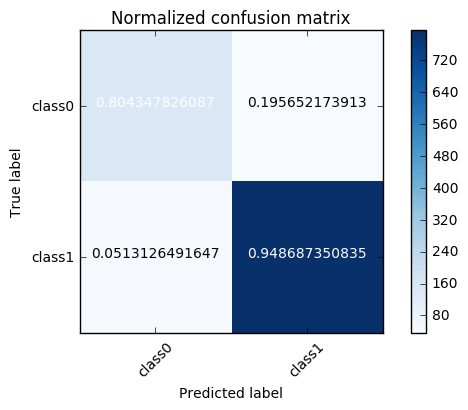

In [117]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Mean Absolute Error -  used to measure how close forecasts or predictions are to the eventual outcomes. It basically giving us the actual deviation of the prediction data  from true data.

In [118]:
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(y_test, y_pred_class)
mae1

0.30919765166340507

Mean Squared Error -The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

In [119]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test, y_pred_class)
mse1

1.2367906066536203

R2 score - is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. it summarizes the overall goodness of the fi in the model.

In [120]:
from sklearn.metrics import r2_score
r2s1=r2_score(y_test, y_pred_class)
r2s1

0.47638009754072841

### Model 2 : Multinomial Model Performance Analysis and Visualization

In [121]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Building the model on the traininf data-set.

In [122]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Prediciting the values using test data-set using the trained model.

In [123]:
y_pred_class = nb.predict(X_test_dtm)

Accuracy Score - the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [124]:
from sklearn import metrics
acc2=metrics.accuracy_score(y_test, y_pred_class)
acc2

0.91878669275929548

Classification Report - Summary of the Precision, Recall, f1score and support.

In [125]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_class, target_names=target_names))
MNBclassreport= classification_report(y_test, y_pred_class, target_names=target_names)

             precision    recall  f1-score   support

    class 0       0.83      0.68      0.75       184
    class 1       0.93      0.97      0.95       838

avg / total       0.92      0.92      0.92      1022



[0.0, 0.83, 0.68, 0.75]
[1.0, 0.93, 0.97, 0.95]


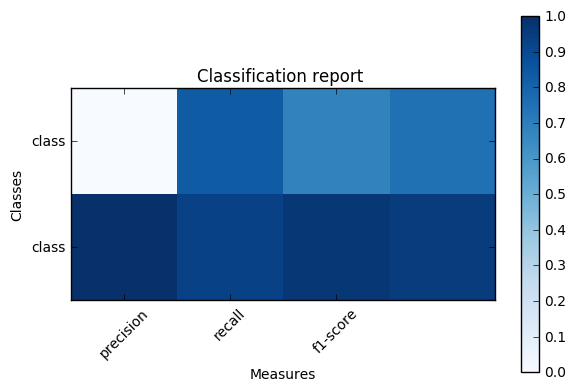

In [126]:
def main():
    plot_classification_report(MNBclassreport)
    plt.show()
    plt.savefig('MultiNB_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

Jaccard Similarity Score -defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

In [127]:
import numpy as np   
from sklearn.metrics import jaccard_similarity_score
js2=jaccard_similarity_score(y_test, y_pred_class, normalize=False)
js2

939

Hamming Loss -The Hamming loss is the fraction of labels that are incorrectly predicted.

In [128]:
from sklearn.metrics import hamming_loss
hl2=hamming_loss(y_test, y_pred_class)
hl2

0.081213307240704496

F1 score - It be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 at various levels.
The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 

In [129]:
from sklearn.metrics import f1_score
f2_m=f1_score(y_test, y_pred_class, average='macro') 
f2_m

0.85183619643153452

In [130]:
f2_mi=f1_score(y_test, y_pred_class, average='micro') 
f2_mi

0.91878669275929548

In [131]:
f2_w=f1_score(y_test, y_pred_class, average='weighted') 

Precision Score - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

In [132]:
from sklearn.metrics import precision_score
pr2_m=precision_score(y_test, y_pred_class, average='macro')
pr2_m

0.8839234799005482

In [133]:
precision_score(y_test, y_pred_class, average='micro') 

0.91878669275929548

In [134]:
precision_score(y_test, y_pred_class, average='weighted') 

0.91559089824724349

In [135]:
precision_score(y_test, y_pred_class, average=None) 

array([ 0.83,  0.93])

Recall Score- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The various levels are:

macro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account

weighted:Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

In [136]:
from sklearn.metrics import recall_score
rc2_m=recall_score(y_test, y_pred_class, average='macro')
rc2_m

0.82747483656739651

In [137]:
recall_score(y_test, y_pred_class, average='micro')

0.91878669275929548

In [138]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_class, average='weighted')

0.91878669275929548

In [139]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_class, average=None)

array([ 0.68,  0.97])

Confusion Matrix - a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j. Our confusion matrix summarizes the correct number of false positives and false negatives. We have labeled class0 as Predicated False and Class1 as Predicted True.

Confusion matrix, without normalization
[[126  58]
 [ 25 813]]
Normalized confusion matrix
[[ 0.68  0.32]
 [ 0.03  0.97]]


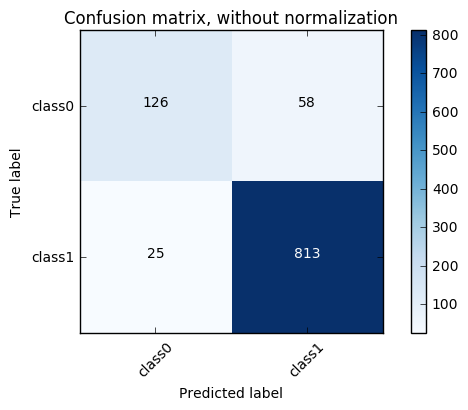

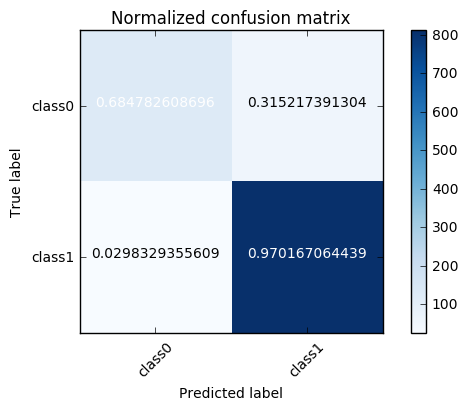

In [140]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Mean Absolute Error -  used to measure how close forecasts or predictions are to the eventual outcomes.

In [141]:
from sklearn.metrics import mean_absolute_error
mae2=mean_absolute_error(y_test, y_pred_class)
mae2

0.32485322896281799

Mean Squared Error -The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_class)

1.2994129158512719

R2 score -is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

In [143]:
from sklearn.metrics import r2_score
r2s2=r2_score(y_test, y_pred_class)
r2s2

0.44986769741620836

### Model 3 : Gaussian Model Performance Analysis and Visualization

In [144]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [147]:
gnb.fit(X_train_dtm.toarray(), y_train)

GaussianNB(priors=None)

In [148]:
y_pred_class = gnb.predict(X_test_dtm.toarray())

Accuracy Score - the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [149]:
from sklearn import metrics
acc3=metrics.accuracy_score(y_test, y_pred_class)

Classification Report - Summary of the Precision, Recall, f1score and support.

In [150]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_class, target_names=target_names))
GNBclassreport= classification_report(y_test, y_pred_class, target_names=target_names)

             precision    recall  f1-score   support

    class 0       0.30      0.36      0.33       184
    class 1       0.85      0.82      0.84       838

avg / total       0.76      0.74      0.74      1022



[0.0, 0.3, 0.36, 0.33]
[1.0, 0.85, 0.82, 0.84]


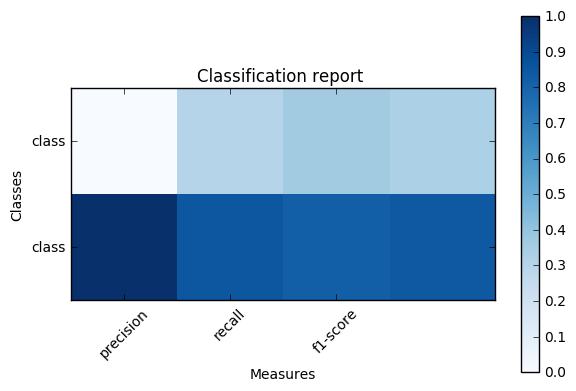

In [151]:
def main():
    plot_classification_report(GNBclassreport)
    plt.show()
    plt.savefig('GaussianNB_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()
if __name__ == "__main__":
    main()

Hamming Loss - The Hamming loss is the fraction of labels that are incorrectly predicted.

In [152]:
from sklearn.metrics import hamming_loss
hl3=hamming_loss(y_test, y_pred_class)

Jaccard Similarity Score - defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

In [153]:
import numpy as np   
from sklearn.metrics import jaccard_similarity_score
js3=jaccard_similarity_score(y_test, y_pred_class, normalize=False)

F1 score - It be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 at various levels.

In [154]:
from sklearn.metrics import f1_score
f3_m=f1_score(y_test, y_pred_class, average='macro') 
f3_m

0.5835245109876841

In [155]:
f1_score(y_test, y_pred_class, average='micro') 


0.735812133072407

In [156]:
f1_score(y_test, y_pred_class, average='weighted') 

0.74468325668899282

Precision Score - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 

In [157]:
from sklearn.metrics import precision_score
pr3_m=precision_score(y_test, y_pred_class, average='macro')
pr3_m

0.5793300838812061

In [158]:
precision_score(y_test, y_pred_class, average='micro') 

0.735812133072407

In [159]:
precision_score(y_test, y_pred_class, average='weighted')

0.75517073709606086

In [160]:
precision_score(y_test, y_pred_class, average=None)  

array([ 0.3 ,  0.85])

Recall Score - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [161]:
from sklearn.metrics import recall_score
rc3_m=recall_score(y_test, y_pred_class, average='macro')
rc3_m

0.59077643457507523

In [162]:
recall_score(y_test, y_pred_class, average='micro')

0.735812133072407

In [163]:
recall_score(y_test, y_pred_class, average='weighted')

0.735812133072407

In [164]:
recall_score(y_test, y_pred_class, average=None)

array([ 0.36,  0.82])

Confusion Matrix - a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.

In [165]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[ 67 117]
 [153 685]]
Normalized confusion matrix
[[ 0.36  0.64]
 [ 0.18  0.82]]


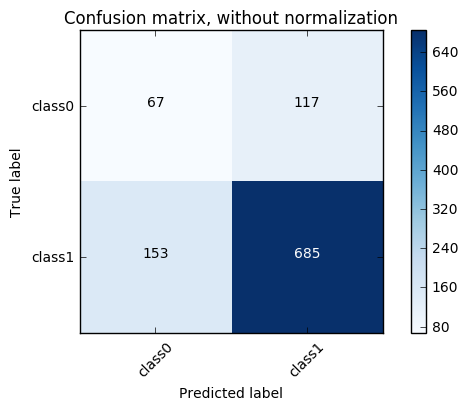

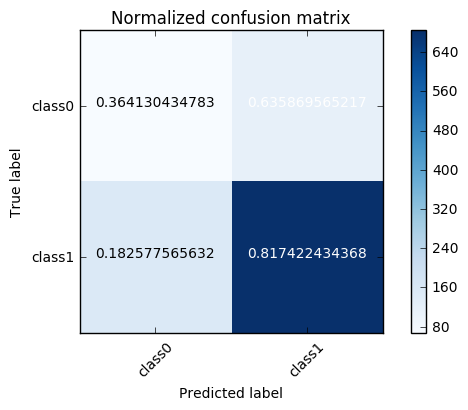

In [166]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Mean Absolute Error -  used to measure how close forecasts or predictions are to the eventual outcomes.

In [167]:
from sklearn.metrics import mean_absolute_error
mae3=mean_absolute_error(y_test, y_pred_class)

Mean Squared Error -The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

In [168]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_class)

4.227005870841487

R2 score -is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

In [169]:
from sklearn.metrics import r2_score
r2s3=r2_score(y_test, y_pred_class)

###  Plot of the above models to compare performance based on reliabilty, prediction count values

In [170]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


In [171]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Linear'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train_dtm.toarray(), y_train)
        y_pred = clf.predict(X_test_dtm.toarray())
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test_dtm.toarray())[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test_dtm.toarray())
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()
    

Linear:
	Brier: 0.053
	Precision: 0.814
	Recall: 0.761
	F1: 0.787

Naive Bayes:
	Brier: 0.264
	Precision: 0.305
	Recall: 0.364
	F1: 0.332

Naive Bayes + Isotonic:
	Brier: 0.142
	Precision: 0.000
	Recall: 0.000
	F1: 0.000



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes + Sigmoid:
	Brier: 0.142
	Precision: 0.000
	Recall: 0.000
	F1: 0.000



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Linear:
	Brier: 0.053
	Precision: 0.814
	Recall: 0.761
	F1: 0.787

SVC:
	Brier: 0.167
	Precision: 0.775
	Recall: 0.804
	F1: 0.789

SVC + Isotonic:
	Brier: 0.059
	Precision: 0.824
	Recall: 0.761
	F1: 0.791

SVC + Sigmoid:
	Brier: 0.059
	Precision: 0.840
	Recall: 0.712
	F1: 0.771

Linear:
	Brier: 0.053
	Precision: 0.814
	Recall: 0.761
	F1: 0.787

MNB:
	Brier: 0.073
	Precision: 0.834
	Recall: 0.685
	F1: 0.752

MNB + Isotonic:
	Brier: 0.084
	Precision: 0.827
	Recall: 0.495
	F1: 0.619

MNB + Sigmoid:
	Brier: 0.090
	Precision: 0.940
	Recall: 0.424
	F1: 0.584



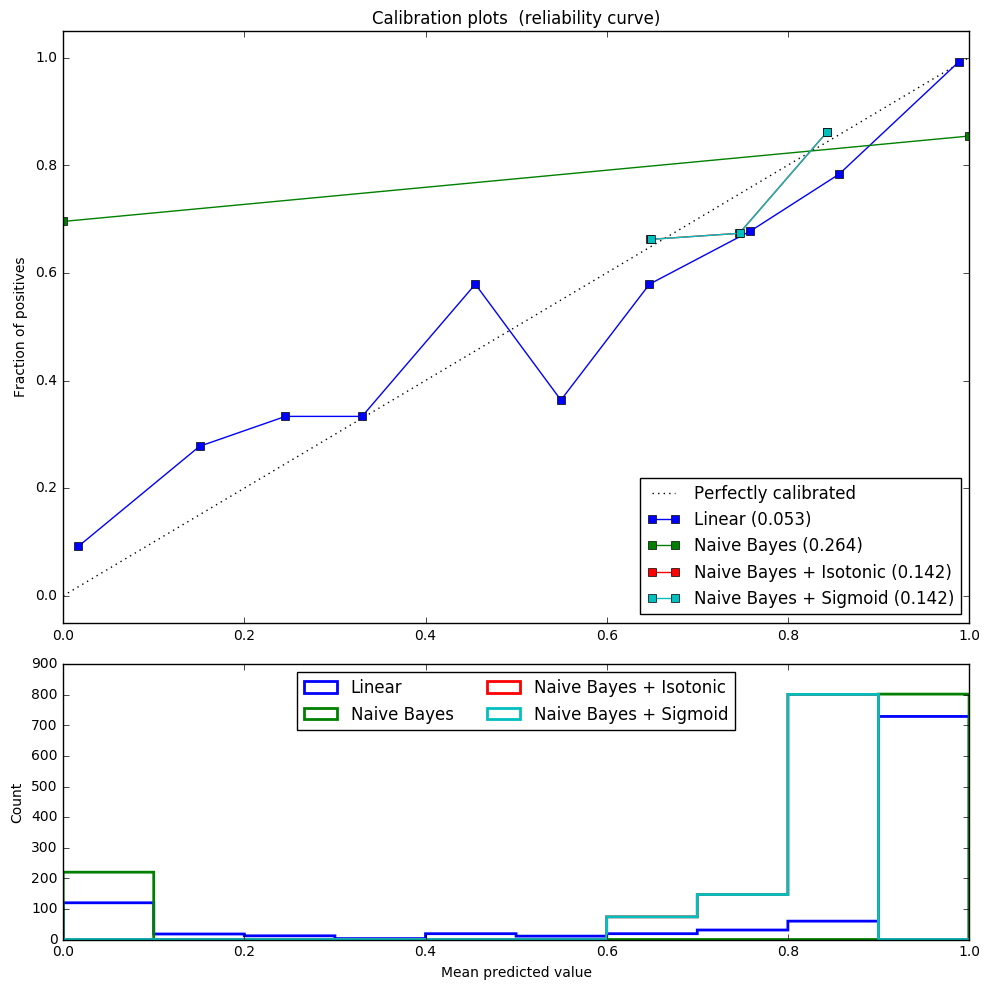

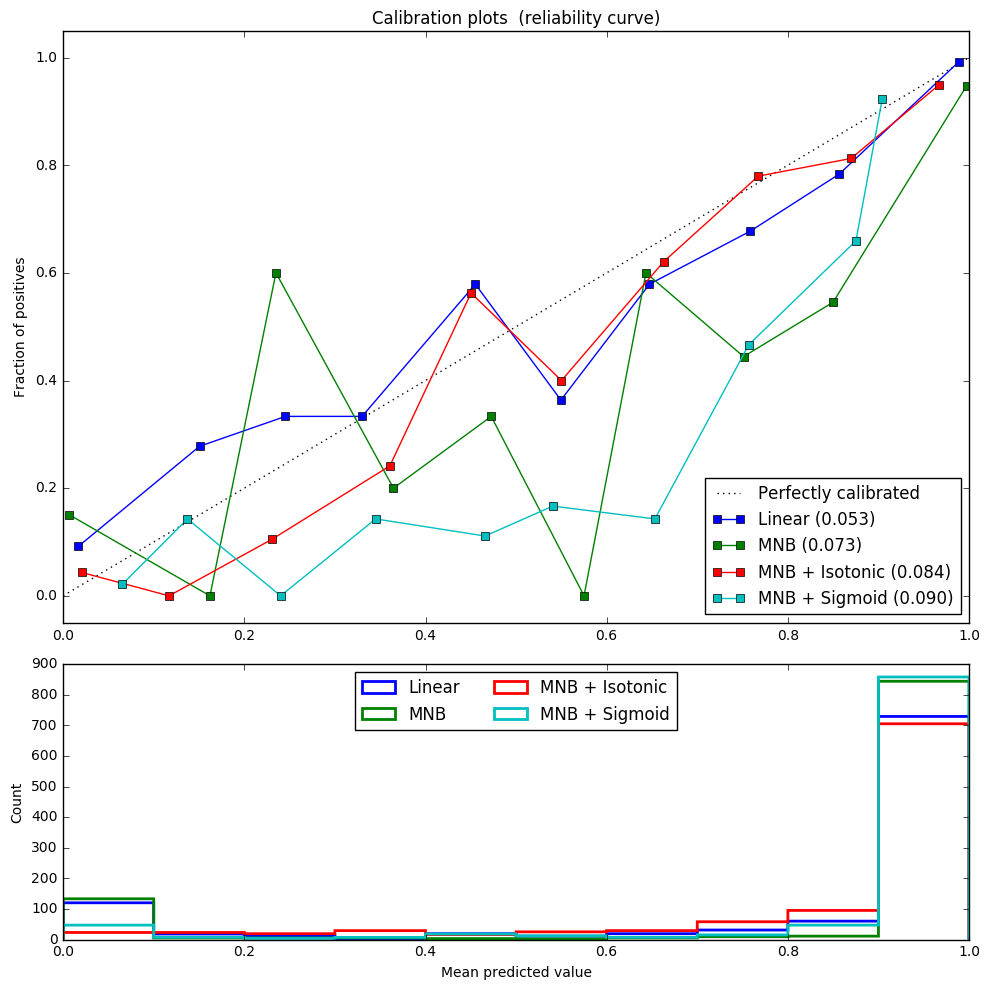

In [172]:

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)
plt.savefig('calibr1.png', dpi=200, format='png', bbox_inches='tight')
# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)
plt.savefig('calibr2.png', dpi=200, format='png', bbox_inches='tight')
# Plot calibration curve for Linear SVC
plot_calibration_curve(MultinomialNB(), "MNB", 2)
plt.savefig('calibr3.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In the above calibration plots, we are comapring the performance based on the relaibility based on fraction of positives and its counts.
We can see that the Linear SVC has highest fraction of positive analyses comparing to Naive Bayes with different kernels names Isotonic and Sigmoid.
Similary we can see that Linear SVC has highest fraction of positives analyses comparing to Multinomial Naive Bayes with different kernels.

#### Accuracy Visualisation of the models

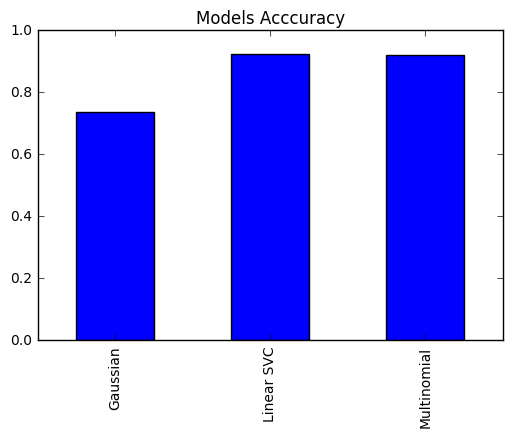

In [173]:
import pandas as pd
import numpy as np
dAaccuracy = {'Linear SVC':acc1, 'Multinomial':acc2,'Gaussian':acc3}
df = pd.Series(data=dAaccuracy)
df.plot(kind='bar', title='Models Acccuracy',stacked=True)
plt.show()

Clearly Linear model has highest Accuracy comparing to rest of the models. 

#### Precision Visualisation of the models

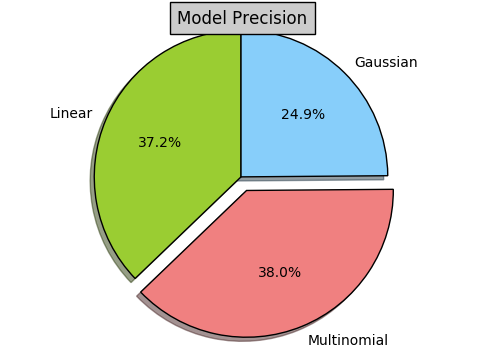

In [174]:
labels = 'Linear', 'Multinomial', 'Gaussian'
sizes = [pr1_m, pr2_m, pr3_m]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Model Precision', bbox={'facecolor':'0.8', 'pad':5})
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

Here the Multinomial model has highest Precision score comparing to rest of the models.

#### F1 Score Visualisation of the models

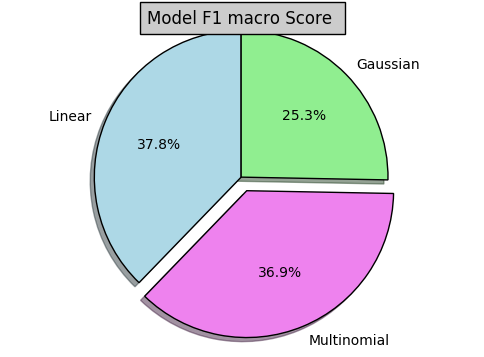

In [175]:
labels = 'Linear', 'Multinomial', 'Gaussian'
#sizes = [0.871, 0.852, 0.584]
sizes = [f1_m, f2_m,f3_m]
colors = ['lightblue', 'violet', 'lightgreen']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Model F1 macro Score ', bbox={'facecolor':'0.8', 'pad':5})
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

We have clearly Linear SVC model treding with highest % area in the pie chart

#### Recall Score Visualisation of the models

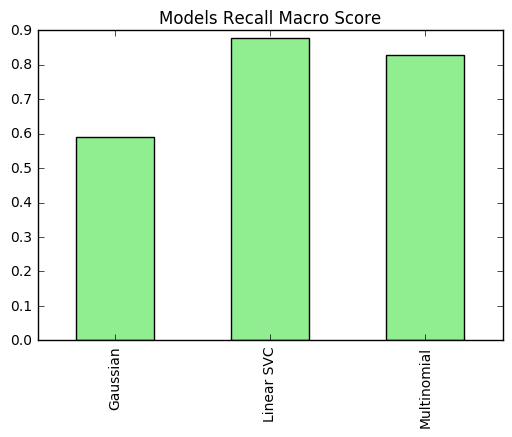

In [176]:
AccGraph = {'Linear SVC':rc1_m, 'Multinomial':rc2_m,'Gaussian':rc3_m}
df = pd.Series(data=AccGraph)
df.plot(kind='bar', title='Models Recall Macro Score', color='lightgreen')
plt.show()

Linear SVC has highest recall score comparing to rest of the models

#### Hamming Loss Visualisation of the models

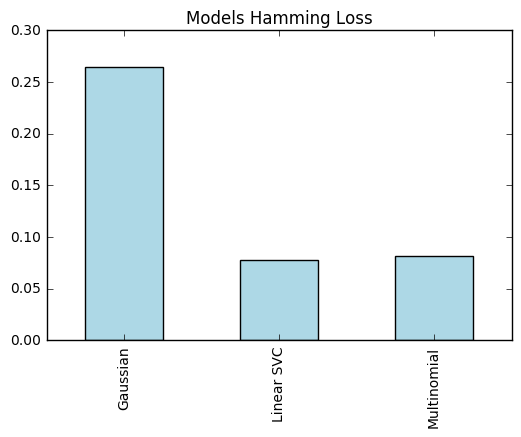

In [177]:
hamming = {'Linear SVC':hl1, 'Multinomial':hl2,'Gaussian':hl3}
df = pd.Series(data=hamming)
df.plot(kind='bar', title='Models Hamming Loss', color='lightblue')
plt.show()

Least Haming Loss of the prediction in the Linear model comparing to the rest of the models.

#### Mean Absolute Error Visualisation of the models

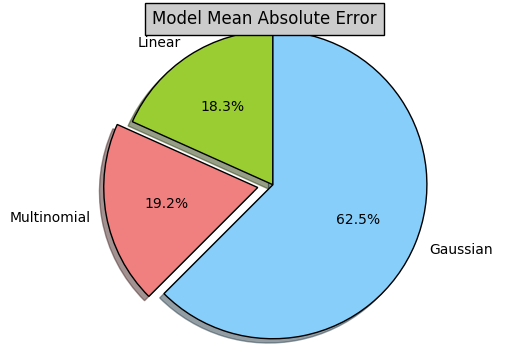

In [178]:
labels = 'Linear', 'Multinomial', 'Gaussian'
sizes = [mae1, mae2, mae3]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Model Mean Absolute Error', bbox={'facecolor':'0.8', 'pad':5})
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

Least absolute error % area of the Linear model with the rest of the models

#### R2 Score Visualisation of the models

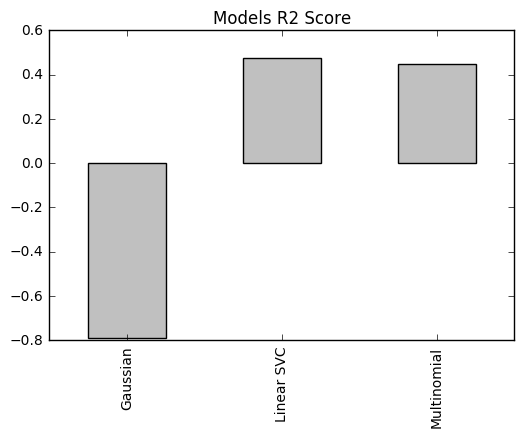

In [179]:
R2Score = {'Linear SVC':r2s1, 'Multinomial':r2s2,'Gaussian':r2s3}
df = pd.Series(data=R2Score)
df.plot(kind='bar', title='Models R2 Score', color='silver')
plt.show()

Here Goodness of the fit is most in Linear model then rest of the model. Gaussian is showing negative trend in the plot because 
it is not fitting with the Linear Regression fitted line at all. It has parabolic regression fit in the nature.

#### Till now we have see and analyzed that the Linear SVC model is prediciting and performing well from the rest models.

### 5. Testing the Models 

### Unit Test cases for Accuracy, Precision and F1 score.

Although we have analyzed and seen that Linear SVC model is trending in performance comparing with rest of the models but still we need to verify and cross check  our result to make any strong conclusion. 
So we have splitted the data into 5 folds data-set through the cross-validation function Stratified KFold and trained the model based on each train data-set to predict the data using test data-set.

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = MultinomialNB()
lin_clf = svm.LinearSVC()
vect = CountVectorizer()
Linaccuracy=0
linear_unit=0
Mnbaccuracy=0
GNB_unit=0
MNB_unit=0
Gnbaccuracy=0
largest=0

//anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.


### Unit Test case for Accuracy score.

Unit Test Case for Accuracy performance metric for all the models

In [181]:
def AccuracyTest(unit_X_train,unit_y_train, unit_X_test,unit_y_test):
    X_train_dtm = vect.fit_transform(unit_X_train)
    X_test_dtm = vect.transform(unit_X_test)
    lin_clf.fit(X_train_dtm, unit_y_train)
    y_pred_class = lin_clf.predict(X_test_dtm)
    linear_unit= metrics.accuracy_score(unit_y_test, y_pred_class)
    #Linaccuracy=Linaccuracy+linear_unit
    gnb.fit(X_train_dtm.toarray(), unit_y_train)
    y_pred_class = gnb.predict(X_test_dtm.toarray())
    GNB_unit= metrics.accuracy_score(unit_y_test, y_pred_class)
    #Gnbaccuracy= Gnbaccuracy+GNB_unit
    nb.fit(X_train_dtm, unit_y_train)
    y_pred_class = nb.predict(X_test_dtm)
    MNB_unit= metrics.accuracy_score(unit_y_test, y_pred_class)
    #Mnbaccuracy=Mnbaccuracy+MNB_unit
    if (linear_unit > GNB_unit) and (linear_unit > MNB_unit):
        largest = "Linear Accuracy with value",linear_unit
    elif (GNB_unit > linear_unit) and (GNB_unit > MNB_unit):
        largest = "Gaussian Accuracy with value",GNB_unit
    else:
        largest = "Multinomial Accuracy with value",MNB_unit
    print("The largest accuracy between Linear Accuracy",linear_unit, "Gaussian Accuracy",GNB_unit, "and Mutinomial Accuracy",MNB_unit,largest)

In [182]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
df = pd.DataFrame()
for train, test in skf.split(X, y):
    X1_train, X1_test, y1_train, y1_test = X[train], X[test], y[train], y[test]
    AccuracyTest(X1_train.dropna(),y1_train.dropna(),X1_test.dropna(),y1_test.dropna())
    #Linaccuracy=Linaccuracy+a


The largest accuracy between Linear Accuracy 0.875362318841 Gaussian Accuracy 0.744927536232 and Mutinomial Accuracy 0.857971014493 ('Linear Accuracy with value', 0.87536231884057969)
The largest accuracy between Linear Accuracy 0.918604651163 Gaussian Accuracy 0.752906976744 and Mutinomial Accuracy 0.886627906977 ('Linear Accuracy with value', 0.91860465116279066)
The largest accuracy between Linear Accuracy 0.907692307692 Gaussian Accuracy 0.784615384615 and Mutinomial Accuracy 0.895384615385 ('Linear Accuracy with value', 0.90769230769230769)
The largest accuracy between Linear Accuracy 0.882716049383 Gaussian Accuracy 0.746913580247 and Mutinomial Accuracy 0.891975308642 ('Multinomial Accuracy with value', 0.89197530864197527)
The largest accuracy between Linear Accuracy 0.902654867257 Gaussian Accuracy 0.793510324484 and Mutinomial Accuracy 0.896755162242 ('Linear Accuracy with value', 0.90265486725663713)


Here we can see that Linear SVC is still has highest accuracy after splitting the data-set in five fold. Linear is trending in each fold.

### Unit Test case for Precision score

In [183]:
from sklearn.metrics import precision_score
def PrecisionTest(unit_X_train,unit_y_train, unit_X_test,unit_y_test):
    X_train_dtm = vect.fit_transform(unit_X_train)
    X_test_dtm = vect.transform(unit_X_test)
    lin_clf.fit(X_train_dtm, unit_y_train)
    y_pred_class = lin_clf.predict(X_test_dtm)
    linear_unit= precision_score(unit_y_test, y_pred_class, average='micro') 
    #Linaccuracy=Linaccuracy+linear_unit
    gnb.fit(X_train_dtm.toarray(), unit_y_train)
    y_pred_class = gnb.predict(X_test_dtm.toarray())
    GNB_unit=precision_score(unit_y_test, y_pred_class, average='micro') 
    #Gnbaccuracy= Gnbaccuracy+GNB_unit
    nb.fit(X_train_dtm, unit_y_train)
    y_pred_class = nb.predict(X_test_dtm)
    MNB_unit= precision_score(unit_y_test, y_pred_class, average='micro') 
    #Mnbaccuracy=Mnbaccuracy+MNB_unit
    if (linear_unit > GNB_unit) and (linear_unit > MNB_unit):
        largest = "Linear precision with value",linear_unit
    elif (GNB_unit > linear_unit) and (GNB_unit > MNB_unit):
        largest = "Gaussian precision with value",GNB_unit
    else:
        largest = "Multinomial precision with value",MNB_unit
    print("The largest precision between Linear precision",linear_unit, "Gaussian precision",GNB_unit, "and Mutinomial precision",MNB_unit,largest)

In [184]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
df = pd.DataFrame()
for train, test in skf.split(X, y):
    X1_train, X1_test, y1_train, y1_test = X[train], X[test], y[train], y[test]
    PrecisionTest(X1_train.dropna(),y1_train.dropna(),X1_test.dropna(),y1_test.dropna())

The largest precision between Linear precision 0.875362318841 Gaussian precision 0.744927536232 and Mutinomial precision 0.857971014493 ('Linear precision with value', 0.87536231884057969)
The largest precision between Linear precision 0.918604651163 Gaussian precision 0.752906976744 and Mutinomial precision 0.886627906977 ('Linear precision with value', 0.91860465116279066)
The largest precision between Linear precision 0.907692307692 Gaussian precision 0.784615384615 and Mutinomial precision 0.895384615385 ('Linear precision with value', 0.90769230769230769)
The largest precision between Linear precision 0.882716049383 Gaussian precision 0.746913580247 and Mutinomial precision 0.891975308642 ('Multinomial precision with value', 0.89197530864197527)
The largest precision between Linear precision 0.902654867257 Gaussian precision 0.793510324484 and Mutinomial precision 0.896755162242 ('Linear precision with value', 0.90265486725663713)


Here we can see that Linear SVC is still has highest precision after splitting the data-set in five fold. Linear is trending in each fold.

### Unit Test Case for F1 Score

In [185]:
from sklearn.metrics import f1_score
def F1scoreTest(unit_X_train,unit_y_train, unit_X_test,unit_y_test):
    X_train_dtm = vect.fit_transform(unit_X_train)
    X_test_dtm = vect.transform(unit_X_test)
    lin_clf.fit(X_train_dtm, unit_y_train)
    y_pred_class = lin_clf.predict(X_test_dtm)
    linear_unit= f1_score(unit_y_test, y_pred_class, average='micro') 
    gnb.fit(X_train_dtm.toarray(), unit_y_train)
    y_pred_class = gnb.predict(X_test_dtm.toarray())
    GNB_unit=f1_score(unit_y_test, y_pred_class, average='micro') 
    nb.fit(X_train_dtm, unit_y_train)
    y_pred_class = nb.predict(X_test_dtm)
    MNB_unit= f1_score(unit_y_test, y_pred_class, average='micro') 
    if (linear_unit > GNB_unit) and (linear_unit > MNB_unit):
        largest = "Linear F1 score with value",linear_unit
    elif (GNB_unit > linear_unit) and (GNB_unit > MNB_unit):
        largest = "Gaussian F1 score with value",GNB_unit
    else:
        largest = "Multinomial F1 score with value",MNB_unit
    print("The largest F1 between Linear score",linear_unit, "Gaussian score",GNB_unit, "and Mutinomial score",MNB_unit,largest)

In [186]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
df = pd.DataFrame()
for train, test in skf.split(X, y):
    X1_train, X1_test, y1_train, y1_test = X[train], X[test], y[train], y[test]
    F1scoreTest(X1_train.dropna(),y1_train.dropna(),X1_test.dropna(),y1_test.dropna())

The largest F1 between Linear score 0.875362318841 Gaussian score 0.744927536232 and Mutinomial score 0.857971014493 ('Linear F1 score with value', 0.87536231884057969)
The largest F1 between Linear score 0.918604651163 Gaussian score 0.752906976744 and Mutinomial score 0.886627906977 ('Linear F1 score with value', 0.91860465116279066)
The largest F1 between Linear score 0.907692307692 Gaussian score 0.784615384615 and Mutinomial score 0.895384615385 ('Linear F1 score with value', 0.90769230769230758)
The largest F1 between Linear score 0.882716049383 Gaussian score 0.746913580247 and Mutinomial score 0.891975308642 ('Multinomial F1 score with value', 0.89197530864197527)
The largest F1 between Linear score 0.902654867257 Gaussian score 0.793510324484 and Mutinomial score 0.896755162242 ('Linear F1 score with value', 0.90265486725663713)


Here we can see that Linear SVC is still has highest accuracy after splitting the data-set in five fold. Linear is trending in each fold.

### We have tested and verified that Linear Model is still performing in all the test cases after splitting the data-set into various folds of training and testing data-set.

# Conclusion

We have analyzed the various models on various performance metrics like Accuracy, Precision, Hamming Loss, Mean absolute error, R2 Score, Recall score, F1 score, jaccard similarity score, Mean Squared error and Confusion Matrix. We have found that among the three, the best model considering all the above performance factors, Linear SVC model is predicting and classifying the SMS as Ham or Spam more precisely.

Below is the overall analysis performance metrics screenshot of all the models.

In [ ]:
# Method	     Accuracy	hamming Loss	f1 score-macro	f1 score-micro	f1 score-weighted	Precision-macro	  Precision-micro 	Precision-weighted	Recall score-macro	Recall score-micro	Recall score-weighted	jaccard_similarity_score	Mean Absolute Error	Mean Squared Error	R2 Score
Linear SVC	     0.923	      0.077	            0.871	        0.923	         0.923	             0.866	         0.923	             0.924	             0.877	              0.923	               0.923	               943.000	                    0.309	         1.237	           0.476
Multinomial	     0.919	      0.081	            0.852	        0.919            0.916	             0.884	         0.919	             0.916	             0.827	              0.919	               0.919	               939.000	                    0.325	         1.299	           0.450
Gaussian	     0.736	      0.264	            0.584	        0.736	         0.745	             0.579	         0.736	             0.755	             0.591	              0.736	               0.736	               752.000	                    1.057	         4.227	          -0.790
